In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
wegmansRFData = mydir + "2019and2020predictions_30dayswindow.csv"
wegmansRF = pd.read_csv(wegmansRFData)

In [3]:
wegmansRF

,Unnamed: 0,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Yesterday Sales,Week Ago Sales,isWeekend,CATCODES,Prediction
0,439,2019-01-07,ASIAN,ASIAN HOT,1.43,1.43,0.00,False,14,39.0
1,440,2019-01-07,ASIAN,ASIAN PACKAGED,41.76,91.42,0.00,False,15,332.0
2,441,2019-01-07,BAKESHOP,BAGELS,12.70,117.27,0.00,False,23,313.0
3,442,2019-01-07,BAKESHOP,BAKESHOP COOKIES,35.63,39.06,0.00,False,26,57.0
4,443,2019-01-07,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,19.35,56.65,0.00,False,27,259.0
...,...,...,...,...,...,...,...,...,...,...
300201,300640,2020-12-31,SUSHI,SKINNY ROLLS SUSHI,6.47,12.94,11.50,False,488,13.0
300202,300641,2020-12-31,SUSHI,VEGGIE SUSHI,16.52,25.15,25.14,False,557,29.0
300203,300642,2020-12-31,ULTIMATE COFFEE,BREAKFAST,6.46,3.23,3.23,False,52,7.0
300204,300643,2020-12-31,ULTIMATE COFFEE,COLD DRINKS,2.12,1.69,4.60,False,112,5.0


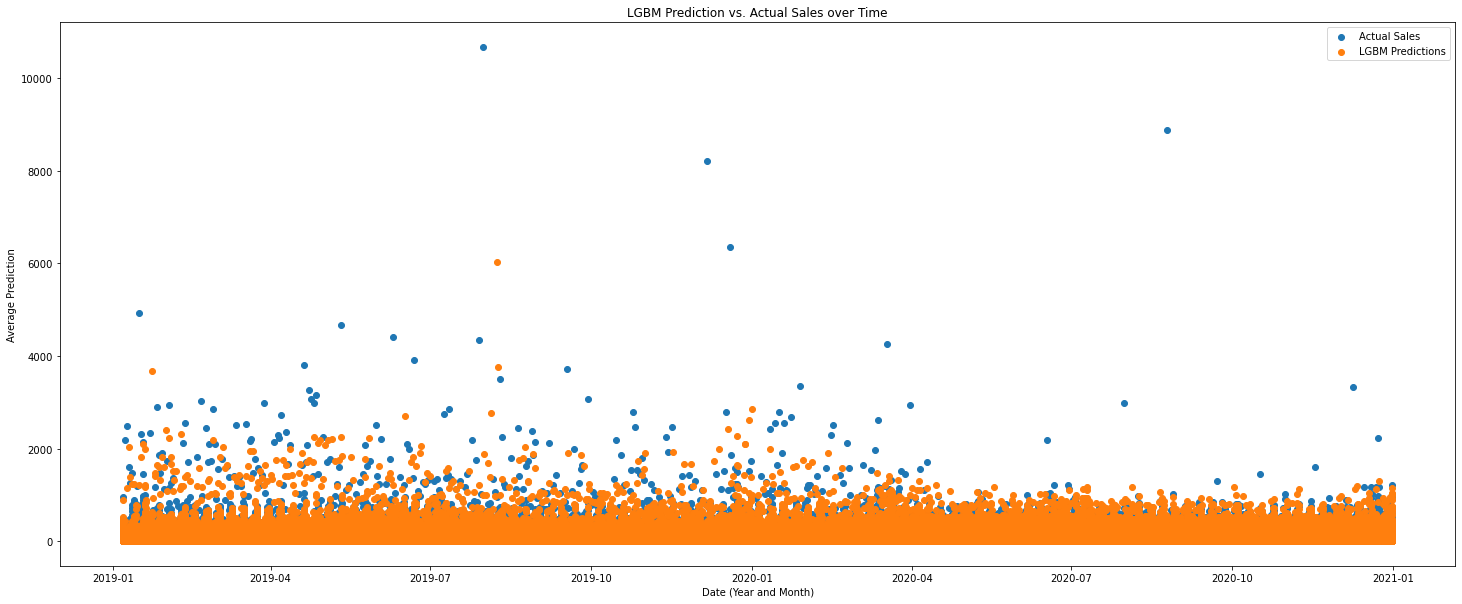

In [4]:
wegmansRF["DATE_KEY"] =  pd.to_datetime(wegmansRF["DATE_KEY"])
x_date = wegmansRF['DATE_KEY']
y = wegmansRF['SALES']

x_datepred = wegmansRF['DATE_KEY']
y_pred = wegmansRF['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y)
plt.scatter(x_datepred,y_pred)

plt.title("LGBM Prediction vs. Actual Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Average Prediction")

plt.legend(["Actual Sales", "LGBM Predictions"])

plt.show()

In [5]:
wegmansRF_digital = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'DIGITAL FULFILLMENT')]

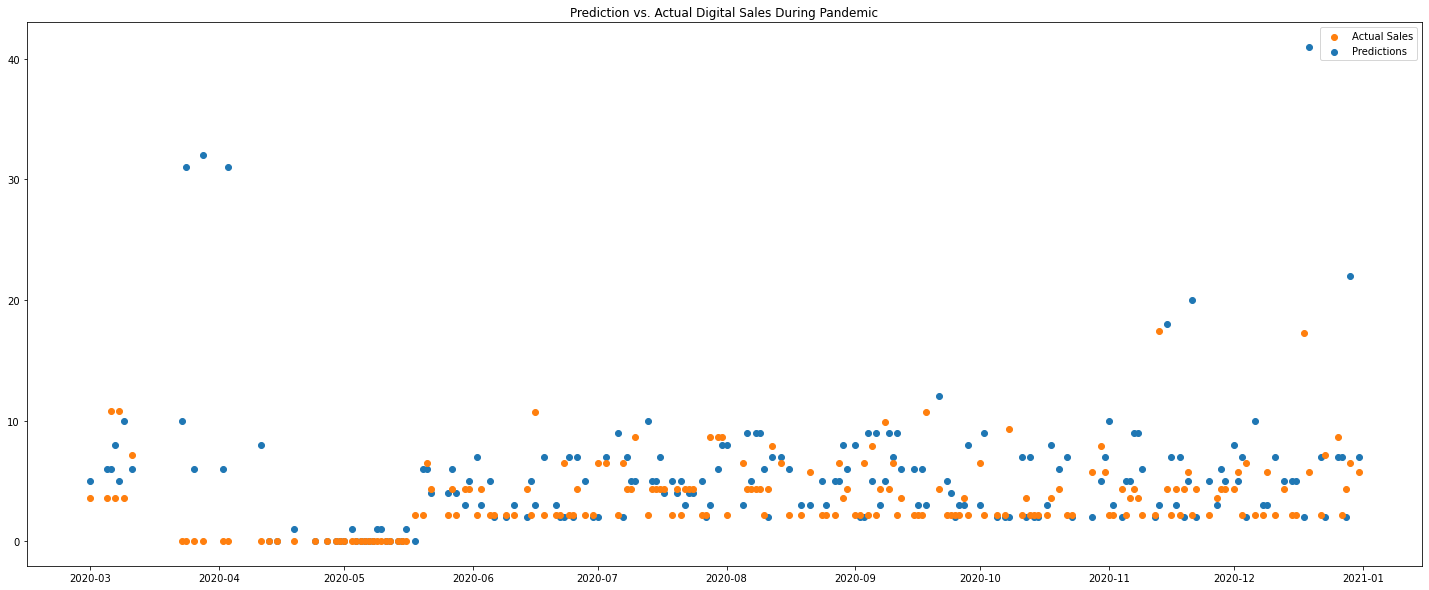

In [6]:
x_date = wegmansRF_digital.loc[wegmansRF_digital.DATE_KEY >= '3/1/2020']['DATE_KEY']
y = wegmansRF_digital.loc[wegmansRF_digital.DATE_KEY >= '3/1/2020']['SALES']

x_datepred = wegmansRF_digital.loc[wegmansRF_digital.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred = wegmansRF_digital.loc[wegmansRF_digital.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y,c='C1',zorder=5)
plt.scatter(x_datepred,y_pred)

plt.title("Prediction vs. Actual Digital Sales During Pandemic")

plt.legend(["Actual Sales", "Predictions"])

plt.show()

In [7]:
wegmansRF_rx = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'PHARMACY RX')]

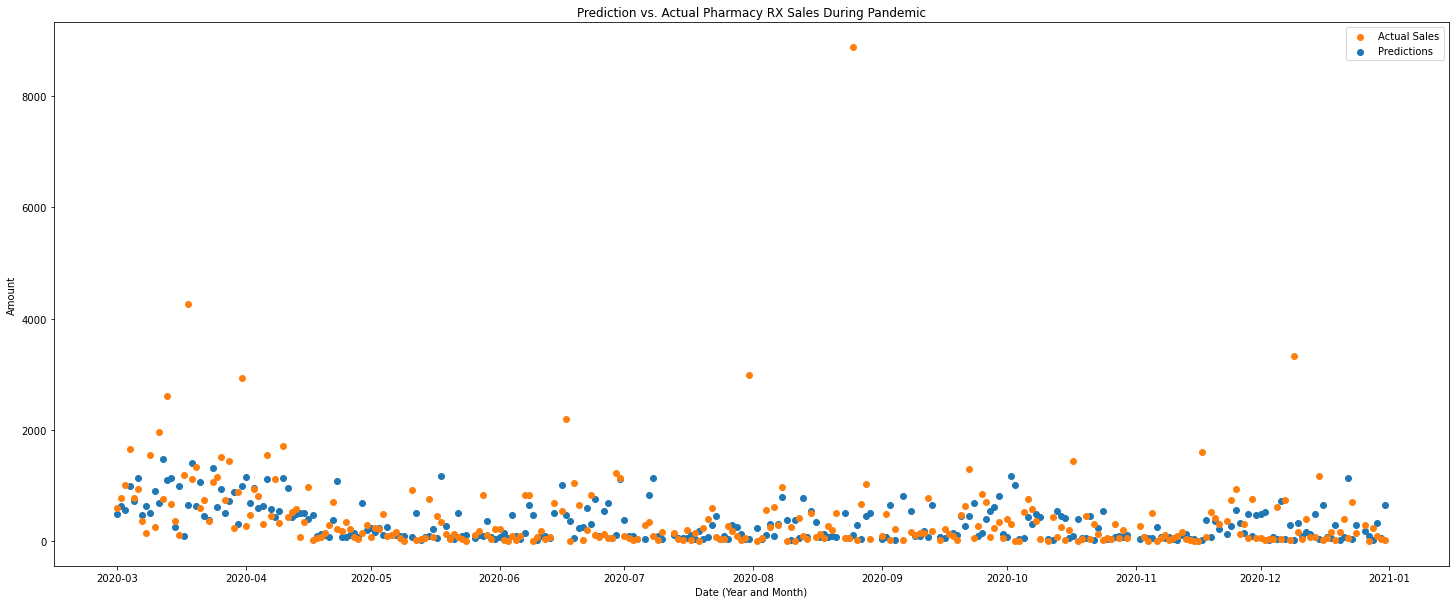

In [8]:
x_date = wegmansRF_rx.loc[wegmansRF_rx.DATE_KEY >= '3/1/2020']['DATE_KEY']
y = wegmansRF_rx.loc[wegmansRF_rx.DATE_KEY >= '3/1/2020']['SALES']

x_datepred_rx = wegmansRF_rx.loc[wegmansRF_rx.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred_rx = wegmansRF_rx.loc[wegmansRF_rx.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y,c='C1',zorder=5)
plt.scatter(x_datepred_rx,y_pred_rx)

plt.title("Prediction vs. Actual Pharmacy RX Sales During Pandemic")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Amount")

plt.legend(["Actual Sales", "Predictions"])

plt.show()

In [9]:
wegmansRF_grocerypre = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'GROCERY')].loc[wegmansRF.DATE_KEY < '3/1/2020']

In [10]:
wegmansRF_groceryduring = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'GROCERY')].loc[wegmansRF.DATE_KEY >= '3/1/2020']

In [11]:
wegmansRF_grocerypre = wegmansRF_grocerypre.groupby(['CATEGORY_NAME'], as_index=False).agg({"SALES": "sum"})
wegmansRF_groceryduring = wegmansRF_groceryduring.groupby(['CATEGORY_NAME'], as_index=False).agg({"SALES": "sum"})

In [12]:
topsales_grocery = pd.merge(wegmansRF_grocerypre, wegmansRF_groceryduring, on='CATEGORY_NAME')

In [13]:
topsales_grocery['CHANGE_IN_SALES'] = ((topsales_grocery['SALES_y']-topsales_grocery['SALES_x'])/topsales_grocery['SALES_x'])

In [14]:
topsales_grocery.sort_values(('CHANGE_IN_SALES'), ascending=False)

,CATEGORY_NAME,SALES_x,SALES_y,CHANGE_IN_SALES
58,MILK PRODUCTS,2837.27,3169.18,0.116982
84,STUFFING,2690.31,2823.05,0.049340
48,INDIAN FOODS,2889.76,3025.31,0.046907
64,PAPER NAPKINS,8976.11,9367.77,0.043634
89,VEGETABLES - DRY,949.18,972.08,0.024126
...,...,...,...,...
4,BABY FORMULA,15787.49,9229.47,-0.415393
7,BARS & FRUIT SNACKS,51534.08,29782.20,-0.422087
3,BABY FOOD,18116.84,10078.80,-0.443678
36,FRONT END CANDY-GUM-MINTS,23966.33,11915.95,-0.502805


In [15]:
wegmansRF_grocery = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'GROCERY')]

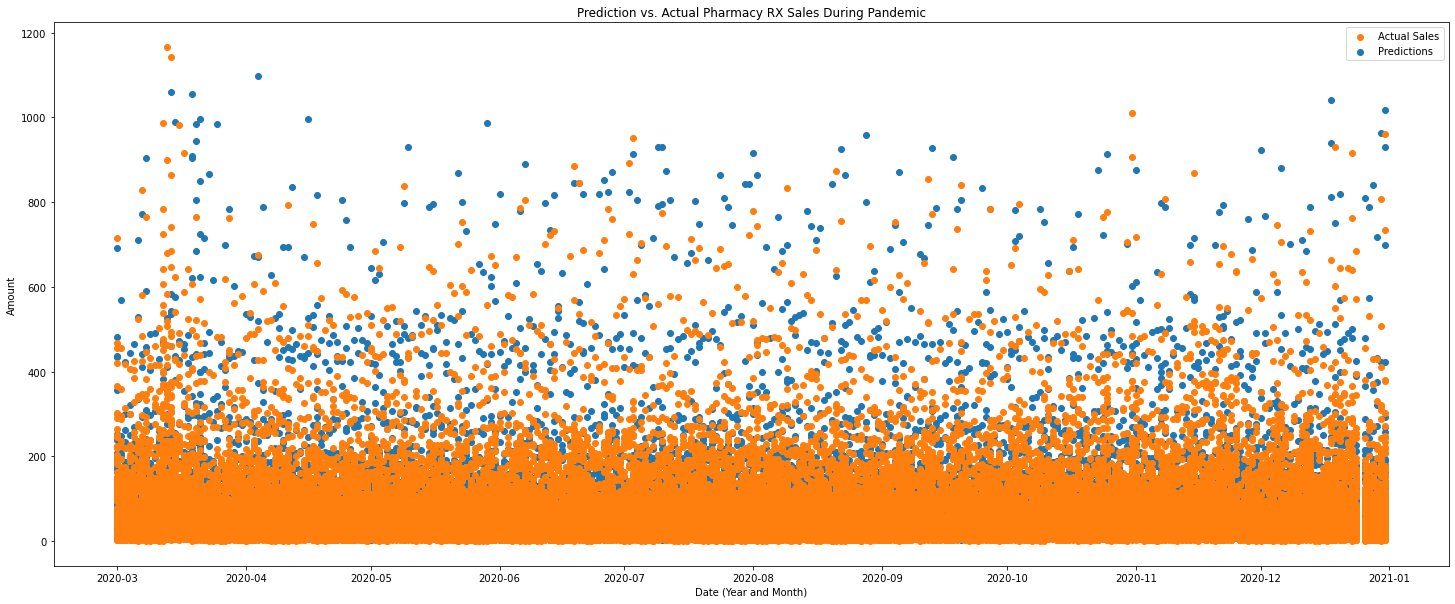

In [16]:
x_date = wegmansRF_grocery.loc[wegmansRF_grocery.DATE_KEY >= '3/1/2020']['DATE_KEY']
y = wegmansRF_grocery.loc[wegmansRF_grocery.DATE_KEY >= '3/1/2020']['SALES']

x_datepred_grocery = wegmansRF_grocery.loc[wegmansRF_grocery.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred_grocery = wegmansRF_grocery.loc[wegmansRF_grocery.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y,c='C1',zorder=5)
plt.scatter(x_datepred_grocery,y_pred_grocery,c='C0')

plt.title("Prediction vs. Actual Pharmacy RX Sales During Pandemic")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Amount")

plt.legend(["Actual Sales", "Predictions"])

plt.show()

In [17]:
wegmansRF_wbpre = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'WBRAND & OTHER')].loc[wegmansRF.DATE_KEY < '3/1/2020']
wegmansRF_wbduring = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'WBRAND & OTHER')].loc[wegmansRF.DATE_KEY >= '3/1/2020']

In [18]:
wegmansRF_wbpre = wegmansRF_wbpre.groupby(['CATEGORY_NAME'], as_index=False).agg({"SALES": "sum"})
wegmansRF_wbduring = wegmansRF_wbduring.groupby(['CATEGORY_NAME'], as_index=False).agg({"SALES": "sum"})

In [19]:
topsales_wb = pd.merge(wegmansRF_wbpre, wegmansRF_wbduring, on='CATEGORY_NAME')
topsales_wb['CHANGE_IN_SALES'] = ((topsales_wb['SALES_y']-topsales_wb['SALES_x'])/topsales_wb['SALES_x'])
topsales_wb.sort_values(('CHANGE_IN_SALES'), ascending=False)

,CATEGORY_NAME,SALES_x,SALES_y,CHANGE_IN_SALES
1,W BRAND RETAIL,25635.26,22780.47,-0.111362
0,SELF-SERVE BARS,61322.30,1682.45,-0.972564


In [20]:
wegmansRF_wbssb = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'WBRAND & OTHER') & (wegmansRF['CATEGORY_NAME'] == 'SELF-SERVE BARS')]

In [21]:
wegmansRF_wbssb

,Unnamed: 0,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Yesterday Sales,Week Ago Sales,isWeekend,CATCODES,Prediction
401,840,2019-01-07,WBRAND & OTHER,SELF-SERVE BARS,191.60,132.36,0.00,False,474,93.0
799,1238,2019-01-08,WBRAND & OTHER,SELF-SERVE BARS,121.94,191.60,0.00,False,474,100.0
1203,1642,2019-01-09,WBRAND & OTHER,SELF-SERVE BARS,162.06,121.94,0.00,False,474,90.0
1579,2018,2019-01-10,WBRAND & OTHER,SELF-SERVE BARS,69.91,162.06,0.00,False,474,111.0
2004,2443,2019-01-11,WBRAND & OTHER,SELF-SERVE BARS,200.26,69.91,0.00,False,474,50.0
...,...,...,...,...,...,...,...,...,...,...
180494,180933,2020-03-13,WBRAND & OTHER,SELF-SERVE BARS,169.00,116.87,192.55,False,474,140.0
180936,181375,2020-03-14,WBRAND & OTHER,SELF-SERVE BARS,7.63,169.00,90.40,True,474,132.0
181736,182175,2020-03-16,WBRAND & OTHER,SELF-SERVE BARS,3.53,7.63,97.53,False,474,47.0
186041,186480,2020-03-27,WBRAND & OTHER,SELF-SERVE BARS,2.97,3.53,149.38,False,474,26.0


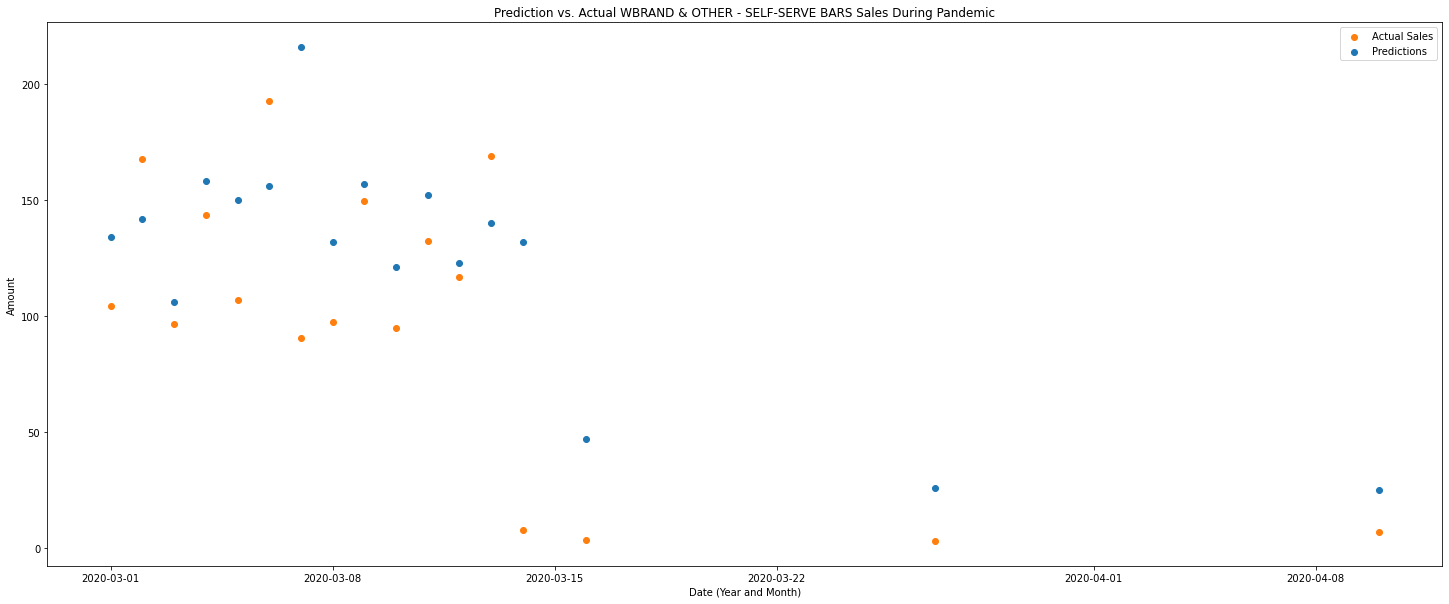

In [22]:
x_date = wegmansRF_wbssb.loc[wegmansRF_wbssb.DATE_KEY >= '3/1/2020']['DATE_KEY']
y = wegmansRF_wbssb.loc[wegmansRF_wbssb.DATE_KEY >= '3/1/2020']['SALES']

x_datepred_wbssb = wegmansRF_wbssb.loc[wegmansRF_wbssb.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred_wbssb = wegmansRF_wbssb.loc[wegmansRF_wbssb.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y,c='C1',zorder=5)
plt.scatter(x_datepred_wbssb,y_pred_wbssb)

plt.title("Prediction vs. Actual WBRAND & OTHER - SELF-SERVE BARS Sales During Pandemic")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Amount")

plt.legend(["Actual Sales","Predictions"])

plt.show()

In [23]:
wegmansRF_restpre = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'RESTAURANTS')].loc[wegmansRF.DATE_KEY < '3/1/2020']
wegmansRF_restduring = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'RESTAURANTS')].loc[wegmansRF.DATE_KEY >= '3/1/2020']

In [24]:
wegmansRF_restpre = wegmansRF_restpre.groupby(['CATEGORY_NAME'], as_index=False).agg({"SALES": "sum"})
wegmansRF_restduring = wegmansRF_restduring.groupby(['CATEGORY_NAME'], as_index=False).agg({"SALES": "sum"})

In [25]:
topsales_rest = pd.merge(wegmansRF_restpre, wegmansRF_restduring, on='CATEGORY_NAME')
topsales_rest['CHANGE_IN_SALES'] = ((topsales_rest['SALES_y']-topsales_rest['SALES_x'])/topsales_rest['SALES_x'])
topsales_rest.sort_values(('CHANGE_IN_SALES'), ascending=False)

,CATEGORY_NAME,SALES_x,SALES_y,CHANGE_IN_SALES
1,BURGER BAR,3578.52,1733.54,-0.515571
2,PUBS,1026.54,18.18,-0.982290
0,AMORE,1292.58,13.86,-0.989277


In [26]:
wegmansRF_rest = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'RESTAURANTS')]

In [27]:
wegmansRF_restpubs = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'RESTAURANTS') & (wegmansRF['CATEGORY_NAME'] == 'PUBS')]

In [28]:
wegmansRF_restamore = wegmansRF[(wegmansRF["DEPARTMENT_NAME"] == 'RESTAURANTS') & (wegmansRF['CATEGORY_NAME'] == 'AMORE')]

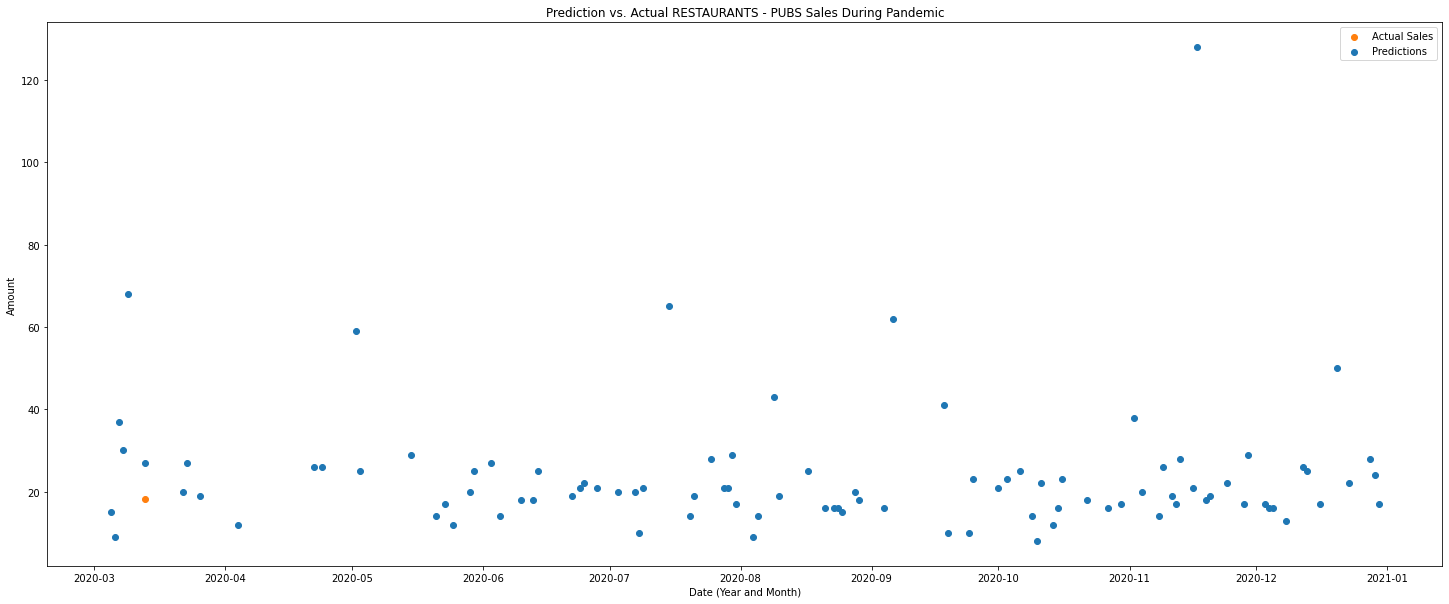

In [29]:
x_date = wegmansRF_restpubs.loc[wegmansRF_restpubs.DATE_KEY >= '3/1/2020']['DATE_KEY']
y = wegmansRF_restpubs.loc[wegmansRF_restpubs.DATE_KEY >= '3/1/2020']['SALES']

x_datepred_rest = wegmansRF_rest.loc[wegmansRF_rest.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred_rest = wegmansRF_rest.loc[wegmansRF_rest.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y,c='C1',zorder=5)
plt.scatter(x_datepred_rest,y_pred_rest)

plt.title("Prediction vs. Actual RESTAURANTS - PUBS Sales During Pandemic")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Amount")

plt.legend(["Actual Sales","Predictions"])

plt.show()

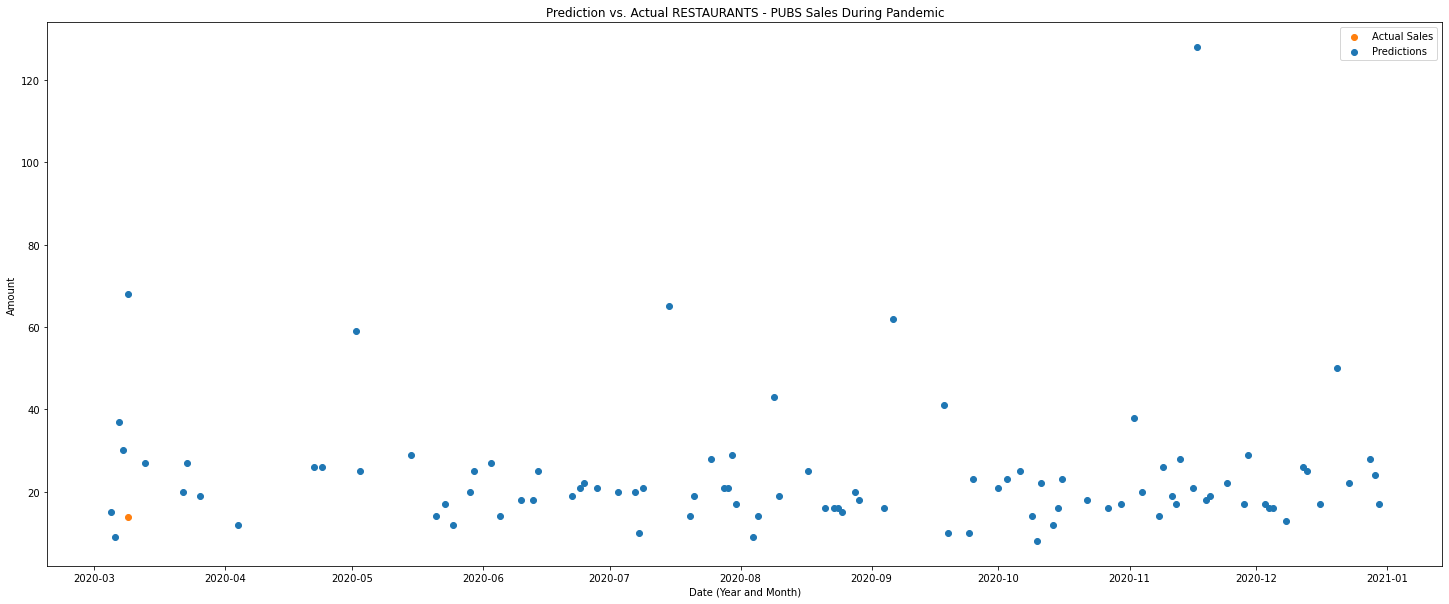

In [30]:
x_date = wegmansRF_restamore.loc[wegmansRF_restamore.DATE_KEY >= '3/1/2020']['DATE_KEY']
y = wegmansRF_restamore.loc[wegmansRF_restamore.DATE_KEY >= '3/1/2020']['SALES']

x_datepred_rest = wegmansRF_rest.loc[wegmansRF_rest.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred_rest = wegmansRF_rest.loc[wegmansRF_rest.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y,c='C1',zorder=5)
plt.scatter(x_datepred_rest,y_pred_rest)

plt.title("Prediction vs. Actual RESTAURANTS - PUBS Sales During Pandemic")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Amount")

plt.legend(["Actual Sales","Predictions"])

plt.show()